### Section 1: Importing and Summarizing Data

In [1]:
# Load tidyverse
library(tidyverse)
library(pracma)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'pracma'


The following object is masked from 'package:purrr':

    cross




In [2]:
# Read in the data
taxis <- read_csv("taxis.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  VendorID = col_double(),
  tpep_pickup_datetime = col_datetime(format = ""),
  tpep_dropoff_datetime = col_datetime(format = ""),
  passenger_count = col_double(),
  trip_distance = col_double(),
  pickup_longitude = col_double(),
  pickup_latitude = col_double(),
  RatecodeID = col_double(),
  store_and_fwd_flag = col_character(),
  dropoff_longitude = col_double(),
  dropoff_latitude = col_double(),
  payment_type = col_double(),
  fare_amount = col_double(),
  extra = col_double(),
  mta_tax = col_double(),
  tip_amount = col_double(),
  tolls_amount = col_double(),
  improvement_surcharge = col_double(),
  total_amount = col_double()
)




In [3]:
# Explore the data
head(taxis)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2016-01-01,2016-01-01 00:00:00,2,1.10,-73.99037,40.73470,1,N,-73.98184,40.73241,2,7.5,0.5,0.5,0,0,0.3,8.8
2,2016-01-01,2016-01-01 00:00:00,5,4.90,-73.98078,40.72991,1,N,-73.94447,40.71668,1,18.0,0.5,0.5,0,0,0.3,19.3
2,2016-01-01,2016-01-01 00:00:00,1,10.54,-73.98455,40.67957,1,N,-73.95027,40.78893,1,33.0,0.5,0.5,0,0,0.3,34.3
2,2016-01-01,2016-01-01 00:00:00,1,4.75,-73.99347,40.71899,1,N,-73.96224,40.65733,2,16.5,0.0,0.5,0,0,0.3,17.3
2,2016-01-01,2016-01-01 00:00:00,3,1.76,-73.96062,40.78133,1,N,-73.97726,40.75851,2,8.0,0.0,0.5,0,0,0.3,8.8
2,2016-01-01,2016-01-01 00:18:30,2,5.52,-73.98012,40.74305,1,N,-73.91349,40.76314,2,19.0,0.5,0.5,0,0,0.3,20.3


In [4]:
# Take a glimpse at your data
glimpse(taxis)

Rows: 30,001
Columns: 19
$ VendorID              <dbl> 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, ~
$ tpep_pickup_datetime  <dttm> 2016-01-01 00:00:00, 2016-01-01 00:00:00, 2016-~
$ tpep_dropoff_datetime <dttm> 2016-01-01 00:00:00, 2016-01-01 00:00:00, 2016-~
$ passenger_count       <dbl> 2, 5, 1, 1, 3, 2, 2, 1, 1, 1, 1, 6, 4, 1, 2, 1, ~
$ trip_distance         <dbl> 1.10, 4.90, 10.54, 4.75, 1.76, 5.52, 7.45, 1.20,~
$ pickup_longitude      <dbl> -73.99037, -73.98078, -73.98455, -73.99347, -73.~
$ pickup_latitude       <dbl> 40.73470, 40.72991, 40.67957, 40.71899, 40.78133~
$ RatecodeID            <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ store_and_fwd_flag    <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N"~
$ dropoff_longitude     <dbl> -73.98184, -73.94447, -73.95027, -73.96224, -73.~
$ dropoff_latitude      <dbl> 40.73241, 40.71668, 40.78893, 40.65733, 40.75851~
$ payment_type          <dbl> 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, ~
$ fare_amount  

In [5]:
# Check out the structure of your data
str(taxis)

spec_tbl_df [30,001 x 19] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ VendorID             : num [1:30001] 2 2 2 2 2 2 2 1 1 2 ...
 $ tpep_pickup_datetime : POSIXct[1:30001], format: "2016-01-01 00:00:00" "2016-01-01 00:00:00" ...
 $ tpep_dropoff_datetime: POSIXct[1:30001], format: "2016-01-01 00:00:00" "2016-01-01 00:00:00" ...
 $ passenger_count      : num [1:30001] 2 5 1 1 3 2 2 1 1 1 ...
 $ trip_distance        : num [1:30001] 1.1 4.9 10.54 4.75 1.76 ...
 $ pickup_longitude     : num [1:30001] -74 -74 -74 -74 -74 ...
 $ pickup_latitude      : num [1:30001] 40.7 40.7 40.7 40.7 40.8 ...
 $ RatecodeID           : num [1:30001] 1 1 1 1 1 1 1 1 1 1 ...
 $ store_and_fwd_flag   : chr [1:30001] "N" "N" "N" "N" ...
 $ dropoff_longitude    : num [1:30001] -74 -73.9 -74 -74 -74 ...
 $ dropoff_latitude     : num [1:30001] 40.7 40.7 40.8 40.7 40.8 ...
 $ payment_type         : num [1:30001] 2 1 1 2 2 2 2 2 2 2 ...
 $ fare_amount          : num [1:30001] 7.5 18 33 16.5 8 19 26 9 18 11.5 ...
 $ ex

In [6]:
# Summarize your data
summary(taxis)

    VendorID     tpep_pickup_datetime          tpep_dropoff_datetime        
 Min.   :1.000   Min.   :2016-01-01 00:00:00   Min.   :2016-01-01 00:00:00  
 1st Qu.:1.000   1st Qu.:2016-01-02 01:33:36   1st Qu.:2016-01-02 01:44:02  
 Median :2.000   Median :2016-01-02 02:33:51   Median :2016-01-02 02:44:32  
 Mean   :1.548   Mean   :2016-01-03 05:27:27   Mean   :2016-01-03 05:42:14  
 3rd Qu.:2.000   3rd Qu.:2016-01-02 03:54:08   3rd Qu.:2016-01-02 04:05:55  
 Max.   :2.000   Max.   :2016-01-29 11:33:12   Max.   :2016-01-30 11:28:54  
 passenger_count trip_distance    pickup_longitude pickup_latitude
 Min.   :1.00    Min.   : 0.000   Min.   :-74.73   Min.   : 0.00  
 1st Qu.:1.00    1st Qu.: 1.160   1st Qu.:-73.99   1st Qu.:40.73  
 Median :1.00    Median : 2.200   Median :-73.99   Median :40.74  
 Mean   :1.79    Mean   : 3.512   Mean   :-72.79   Mean   :40.09  
 3rd Qu.:2.00    3rd Qu.: 4.480   3rd Qu.:-73.98   3rd Qu.:40.76  
 Max.   :6.00    Max.   :47.390   Max.   :  0.00   Max.   :

In [7]:
# Create total_amount_col
total_amount_col <- taxis[,19]
head(total_amount_col)

total_amount
<dbl>
8.8
19.3
34.3
17.3
8.8
20.3


In [8]:
# Extract the 125th row
row_125 <- taxis[125,]
row_125

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2016-01-01 00:01:21,2016-01-01 00:27:41,6,8.78,-73.99663,40.7246,1,N,-73.86998,40.75529,2,27,0.5,0.5,0,0,0.3,28.3


In [9]:
# Find passenger_count_1031
passenger_count_1031 <- taxis[1031,4]
passenger_count_1031

passenger_count
<dbl>
1


In [10]:
# Find the mean and standard deviation of trip_distance
mean(taxis$trip_distance)
sd(taxis$trip_distance)

[1] 3.512003

[1] 3.745331

In [11]:
# Find the 25th, 50th, and 75th percentiles of trip_distance
quantile(taxis$trip_distance, c(.25,.50,.75))

25%  50%  75% 
1.16 2.20 4.48

In [12]:
# Find the numeric columns
numeric_cols <- sapply(taxis, is.numeric)
numeric_cols

VendorID  tpep_pickup_datetime tpep_dropoff_datetime 
                 TRUE                 FALSE                 FALSE 
      passenger_count         trip_distance      pickup_longitude 
                 TRUE                  TRUE                  TRUE 
      pickup_latitude            RatecodeID    store_and_fwd_flag 
                 TRUE                  TRUE                 FALSE 
    dropoff_longitude      dropoff_latitude          payment_type 
                 TRUE                  TRUE                  TRUE 
          fare_amount                 extra               mta_tax 
                 TRUE                  TRUE                  TRUE 
           tip_amount          tolls_amount improvement_surcharge 
                 TRUE                  TRUE                  TRUE 
         total_amount 
                 TRUE

In [13]:
# Create taxis_numeric
taxis_numeric <- taxis[,c("VendorID","passenger_count","trip_distance","pickup_longitude","pickup_latitude","RatecodeID","dropoff_longitude","dropoff_latitude","fare_amount","extra","mta_tax","tip_amount","tolls_amount","total_amount")]
head(taxis_numeric)

VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,1.10,-73.99037,40.73470,1,-73.98184,40.73241,7.5,0.5,0.5,0,0,8.8
2,5,4.90,-73.98078,40.72991,1,-73.94447,40.71668,18.0,0.5,0.5,0,0,19.3
2,1,10.54,-73.98455,40.67957,1,-73.95027,40.78893,33.0,0.5,0.5,0,0,34.3
2,1,4.75,-73.99347,40.71899,1,-73.96224,40.65733,16.5,0.0,0.5,0,0,17.3
2,3,1.76,-73.96062,40.78133,1,-73.97726,40.75851,8.0,0.0,0.5,0,0,8.8
2,2,5.52,-73.98012,40.74305,1,-73.91349,40.76314,19.0,0.5,0.5,0,0,20.3


In [14]:
# Find means of all numeric columns
all_means <- sapply(taxis_numeric,mean)
all_means

VendorID   passenger_count     trip_distance  pickup_longitude 
        1.5475151         1.7895070         3.5120029       -72.7933183 
  pickup_latitude        RatecodeID dropoff_longitude  dropoff_latitude 
       40.0913767         1.0574981       -72.8546073        40.1344258 
      fare_amount             extra           mta_tax        tip_amount 
       13.1430809         0.4653845         0.4946835         1.5283781 
     tolls_amount      total_amount 
        0.2330839        16.1641409

In [15]:
# Define columns
columns <- c('trip_distance','total_amount','passenger_count')
head(columns)

[1] "trip_distance"   "total_amount"    "passenger_count"

In [16]:
# Create summary function
taxis_summary <- function(col, data) {
  c(
    mean = mean(data[[col]]), 
    sd = sd(data[[col]]),
    quantile(data[[col]], c(.25,.50,.75))
    )
}

In [17]:
# Use sapply to summarize columns
sapply(columns, taxis_summary, taxis)

,trip_distance,total_amount,passenger_count
mean,3.512003,16.16414,1.789507
sd,3.745331,13.44221,1.387008
25%,1.160000,8.30000,1.000000
50%,2.200000,11.80000,1.000000
75%,4.480000,18.95000,2.000000


In [18]:
# Find the correlation between trip_distance and total_amount
cor(taxis$trip_distance,taxis$total_amount)

[1] 0.8784159

In [19]:
# Find the correlation of a different pair of columns
cor(taxis$extra,taxis$total_amount)

[1] -0.3000058

### Section 2: Manipulating Data

In [20]:
ls(taxis)

[1] "dropoff_latitude"      "dropoff_longitude"     "extra"                
 [4] "fare_amount"           "improvement_surcharge" "mta_tax"              
 [7] "passenger_count"       "payment_type"          "pickup_latitude"      
[10] "pickup_longitude"      "RatecodeID"            "store_and_fwd_flag"   
[13] "tip_amount"            "tolls_amount"          "total_amount"         
[16] "tpep_dropoff_datetime" "tpep_pickup_datetime"  "trip_distance"        
[19] "VendorID"

In [21]:
# Select the geographic columns
taxis_geo <- taxis %>% 
  select(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude,trip_distance)

In [22]:
head(taxis_geo)

pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-73.99037,40.73470,-73.98184,40.73241,1.10
-73.98078,40.72991,-73.94447,40.71668,4.90
-73.98455,40.67957,-73.95027,40.78893,10.54
-73.99347,40.71899,-73.96224,40.65733,4.75
-73.96062,40.78133,-73.97726,40.75851,1.76
-73.98012,40.74305,-73.91349,40.76314,5.52


In [23]:
# Create taxis_smaller
taxis_smaller <- taxis %>% 
  select(-VendorID, -store_and_fwd_flag)

In [24]:
head(taxis_smaller)

tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-01-01,2016-01-01 00:00:00,2,1.10,-73.99037,40.73470,1,-73.98184,40.73241,2,7.5,0.5,0.5,0,0,0.3,8.8
2016-01-01,2016-01-01 00:00:00,5,4.90,-73.98078,40.72991,1,-73.94447,40.71668,1,18.0,0.5,0.5,0,0,0.3,19.3
2016-01-01,2016-01-01 00:00:00,1,10.54,-73.98455,40.67957,1,-73.95027,40.78893,1,33.0,0.5,0.5,0,0,0.3,34.3
2016-01-01,2016-01-01 00:00:00,1,4.75,-73.99347,40.71899,1,-73.96224,40.65733,2,16.5,0.0,0.5,0,0,0.3,17.3
2016-01-01,2016-01-01 00:00:00,3,1.76,-73.96062,40.78133,1,-73.97726,40.75851,2,8.0,0.0,0.5,0,0,0.3,8.8
2016-01-01,2016-01-01 00:18:30,2,5.52,-73.98012,40.74305,1,-73.91349,40.76314,2,19.0,0.5,0.5,0,0,0.3,20.3


In [25]:
# Print the size of taxis and taxis_smaller

dim(taxis)

dim(taxis_smaller)

[1] 30001    19

[1] 30001    17

In [26]:
str(taxis)

spec_tbl_df [30,001 x 19] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ VendorID             : num [1:30001] 2 2 2 2 2 2 2 1 1 2 ...
 $ tpep_pickup_datetime : POSIXct[1:30001], format: "2016-01-01 00:00:00" "2016-01-01 00:00:00" ...
 $ tpep_dropoff_datetime: POSIXct[1:30001], format: "2016-01-01 00:00:00" "2016-01-01 00:00:00" ...
 $ passenger_count      : num [1:30001] 2 5 1 1 3 2 2 1 1 1 ...
 $ trip_distance        : num [1:30001] 1.1 4.9 10.54 4.75 1.76 ...
 $ pickup_longitude     : num [1:30001] -74 -74 -74 -74 -74 ...
 $ pickup_latitude      : num [1:30001] 40.7 40.7 40.7 40.7 40.8 ...
 $ RatecodeID           : num [1:30001] 1 1 1 1 1 1 1 1 1 1 ...
 $ store_and_fwd_flag   : chr [1:30001] "N" "N" "N" "N" ...
 $ dropoff_longitude    : num [1:30001] -74 -73.9 -74 -74 -74 ...
 $ dropoff_latitude     : num [1:30001] 40.7 40.7 40.8 40.7 40.8 ...
 $ payment_type         : num [1:30001] 2 1 1 2 2 2 2 2 2 2 ...
 $ fare_amount          : num [1:30001] 7.5 18 33 16.5 8 19 26 9 18 11.5 ...
 $ ex

In [27]:
# Create taxis_numeric
taxis_numeric <- taxis %>% 
      select_if(is.numeric)

In [28]:
head(taxis_numeric)

VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,1.10,-73.99037,40.73470,1,-73.98184,40.73241,2,7.5,0.5,0.5,0,0,0.3,8.8
2,5,4.90,-73.98078,40.72991,1,-73.94447,40.71668,1,18.0,0.5,0.5,0,0,0.3,19.3
2,1,10.54,-73.98455,40.67957,1,-73.95027,40.78893,1,33.0,0.5,0.5,0,0,0.3,34.3
2,1,4.75,-73.99347,40.71899,1,-73.96224,40.65733,2,16.5,0.0,0.5,0,0,0.3,17.3
2,3,1.76,-73.96062,40.78133,1,-73.97726,40.75851,2,8.0,0.0,0.5,0,0,0.3,8.8
2,2,5.52,-73.98012,40.74305,1,-73.91349,40.76314,2,19.0,0.5,0.5,0,0,0.3,20.3


In [29]:
# Ouput the correlation matrix
cor(taxis_numeric)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
VendorID,1.000000000,0.262540509,0.008926689,-0.044939892,0.045037419,0.007917738,-0.046168305,0.046256047,-0.023800429,0.007149731,-0.01013964,0.007785521,0.005870923,-0.0061061401,-0.0249288215,0.006535851
passenger_count,0.262540509,1.000000000,0.017714229,-0.014739769,0.014647078,-0.008908202,-0.015044600,0.014975874,-0.019479091,0.011877321,0.01957661,0.005927385,0.009647988,0.0250958877,0.0119653071,0.014787292
trip_distance,0.008926689,0.017714229,1.000000000,-0.013691300,0.013814486,0.254133008,-0.014632440,0.015888087,-0.022755681,0.894906002,-0.20611338,-0.126408731,0.367974615,0.4765862140,0.0256717584,0.878415881
pickup_longitude,-0.044939892,-0.014739769,-0.013691300,1.000000000,-0.999974948,0.140806355,0.882732406,-0.882748282,-0.004763404,0.033762915,-0.05925876,-0.087481488,0.020685874,-0.0071081037,-0.0304687643,0.031123431
pickup_latitude,0.045037419,0.014647078,0.013814486,-0.999974948,1.000000000,-0.140752822,-0.882718556,0.882774599,0.005344911,-0.033697529,0.05877245,0.087477264,-0.020963970,0.0075296483,0.0304150147,-0.031086798
RatecodeID,0.007917738,-0.008908202,0.254133008,0.140806355,-0.140752822,1.000000000,0.105746920,-0.106509627,-0.022991516,0.472776148,-0.44619900,-0.670231317,0.213274312,0.3855303562,-0.0486823084,0.475715665
dropoff_longitude,-0.046168305,-0.015044600,-0.014632440,0.882732406,-0.882718556,0.105746920,1.000000000,-0.999936428,0.005333462,0.025530662,-0.04625860,-0.070029135,0.012395166,-0.0084993801,-0.0215935692,0.022528947
dropoff_latitude,0.046256047,0.014975874,0.015888087,-0.882748282,0.882774599,-0.106509627,-0.999936428,1.000000000,-0.004649523,-0.024799207,0.04630285,0.071311926,-0.012756486,0.0077094238,0.0215945633,-0.022057693
payment_type,-0.023800429,-0.019479091,-0.022755681,-0.004763404,0.005344911,-0.022991516,0.005333462,-0.004649523,1.000000000,-0.035033036,0.03221611,-0.039852122,-0.465516484,-0.0162173112,-0.0973183553,-0.126147908
fare_amount,0.007149731,0.011877321,0.894906002,0.033762915,-0.033697529,0.472776148,0.025530662,-0.024799207,-0.035033036,1.000000000,-0.30429139,-0.259129841,0.417343984,0.4961016692,0.0504707659,0.977981543


In [30]:
# Add trip_distance_kms
taxis_with_kms <- taxis %>%
  mutate(trip_distance_kms = trip_distance*1.609)

In [31]:
head(taxis_with_kms)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_kms
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2016-01-01,2016-01-01 00:00:00,2,1.10,-73.99037,40.73470,1,N,-73.98184,40.73241,2,7.5,0.5,0.5,0,0,0.3,8.8,1.76990
2,2016-01-01,2016-01-01 00:00:00,5,4.90,-73.98078,40.72991,1,N,-73.94447,40.71668,1,18.0,0.5,0.5,0,0,0.3,19.3,7.88410
2,2016-01-01,2016-01-01 00:00:00,1,10.54,-73.98455,40.67957,1,N,-73.95027,40.78893,1,33.0,0.5,0.5,0,0,0.3,34.3,16.95886
2,2016-01-01,2016-01-01 00:00:00,1,4.75,-73.99347,40.71899,1,N,-73.96224,40.65733,2,16.5,0.0,0.5,0,0,0.3,17.3,7.64275
2,2016-01-01,2016-01-01 00:00:00,3,1.76,-73.96062,40.78133,1,N,-73.97726,40.75851,2,8.0,0.0,0.5,0,0,0.3,8.8,2.83184
2,2016-01-01,2016-01-01 00:18:30,2,5.52,-73.98012,40.74305,1,N,-73.91349,40.76314,2,19.0,0.5,0.5,0,0,0.3,20.3,8.88168


In [32]:
# Add cost_per_mile
taxis_with_cost_mile <- taxis %>% 
  mutate(cost_per_mile = total_amount/trip_distance)

In [33]:
head(taxis_with_cost_mile)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,cost_per_mile
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2016-01-01,2016-01-01 00:00:00,2,1.10,-73.99037,40.73470,1,N,-73.98184,40.73241,2,7.5,0.5,0.5,0,0,0.3,8.8,8.000000
2,2016-01-01,2016-01-01 00:00:00,5,4.90,-73.98078,40.72991,1,N,-73.94447,40.71668,1,18.0,0.5,0.5,0,0,0.3,19.3,3.938776
2,2016-01-01,2016-01-01 00:00:00,1,10.54,-73.98455,40.67957,1,N,-73.95027,40.78893,1,33.0,0.5,0.5,0,0,0.3,34.3,3.254269
2,2016-01-01,2016-01-01 00:00:00,1,4.75,-73.99347,40.71899,1,N,-73.96224,40.65733,2,16.5,0.0,0.5,0,0,0.3,17.3,3.642105
2,2016-01-01,2016-01-01 00:00:00,3,1.76,-73.96062,40.78133,1,N,-73.97726,40.75851,2,8.0,0.0,0.5,0,0,0.3,8.8,5.000000
2,2016-01-01,2016-01-01 00:18:30,2,5.52,-73.98012,40.74305,1,N,-73.91349,40.76314,2,19.0,0.5,0.5,0,0,0.3,20.3,3.677536


In [34]:
# Create my_distance and diff
taxis_my_dist <- taxis  %>% 
  mutate(my_distance = hav_dist(pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude),
         diff = trip_distance-my_distance)

ERROR: Error: Problem with `mutate()` input `my_distance`.
[31mx[39m could not find function "hav_dist"
[34mi[39m Input `my_distance` is `hav_dist(...)`.


In [ ]:
# Find the min and the max of diff

min(taxis_my_dist$diff)

max(taxis_my_dist$diff)


In [35]:
taxis_standard_rate <- filter(taxis, RatecodeID == 1)

In [36]:
# Check the size of the dataframes
dim(taxis)
dim(taxis_standard_rate)

[1] 30001    19

[1] 29095    19

In [37]:
# Filter taxis
taxis_groups <- taxis %>%
  filter(passenger_count > 1)

In [38]:
head(taxis_groups)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.99037,40.73470,1,N,-73.98184,40.73241,2,7.5,0.5,0.5,0.00,0,0.3,8.80
2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.98078,40.72991,1,N,-73.94447,40.71668,1,18.0,0.5,0.5,0.00,0,0.3,19.30
2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.96062,40.78133,1,N,-73.97726,40.75851,2,8.0,0.0,0.5,0.00,0,0.3,8.80
2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.98012,40.74305,1,N,-73.91349,40.76314,2,19.0,0.5,0.5,0.00,0,0.3,20.30
2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.99406,40.71999,1,N,-73.96636,40.78987,2,26.0,0.5,0.5,0.00,0,0.3,27.30
2,2016-01-01 00:00:03,2016-01-01 00:15:49,6,2.43,-73.96933,40.76354,1,N,-73.99569,40.74425,1,12.0,0.5,0.5,3.99,0,0.3,17.29


In [39]:
# Group and summarize the data
taxis %>% group_by(passenger_count) %>% 
  summarize(n = n(), mean_cost = mean(total_amount))

passenger_count,n,mean_cost
<dbl>,<int>,<dbl>
1,19658,15.86088
2,4866,17.03844
3,1672,16.91711
4,838,17.00297
5,1873,15.80994
6,1094,16.53775


In [40]:
# Group and summarize the data
taxis %>% group_by(RatecodeID) %>% 
  summarize(mean = mean(trip_distance), sd = sd(trip_distance))

RatecodeID,mean,sd
<dbl>,<dbl>,<dbl>
1,3.195932,3.023750
2,17.038276,4.295977
3,16.669748,7.418554
4,10.337500,5.159266
5,4.050263,7.633558


### Section 3: Visualizing Data

In [54]:
head(taxis)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2016-01-01,2016-01-01 00:00:00,2,1.10,-73.99037,40.73470,1,N,-73.98184,40.73241,2,7.5,0.5,0.5,0,0,0.3,8.8
2,2016-01-01,2016-01-01 00:00:00,5,4.90,-73.98078,40.72991,1,N,-73.94447,40.71668,1,18.0,0.5,0.5,0,0,0.3,19.3
2,2016-01-01,2016-01-01 00:00:00,1,10.54,-73.98455,40.67957,1,N,-73.95027,40.78893,1,33.0,0.5,0.5,0,0,0.3,34.3
2,2016-01-01,2016-01-01 00:00:00,1,4.75,-73.99347,40.71899,1,N,-73.96224,40.65733,2,16.5,0.0,0.5,0,0,0.3,17.3
2,2016-01-01,2016-01-01 00:00:00,3,1.76,-73.96062,40.78133,1,N,-73.97726,40.75851,2,8.0,0.0,0.5,0,0,0.3,8.8
2,2016-01-01,2016-01-01 00:18:30,2,5.52,-73.98012,40.74305,1,N,-73.91349,40.76314,2,19.0,0.5,0.5,0,0,0.3,20.3


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



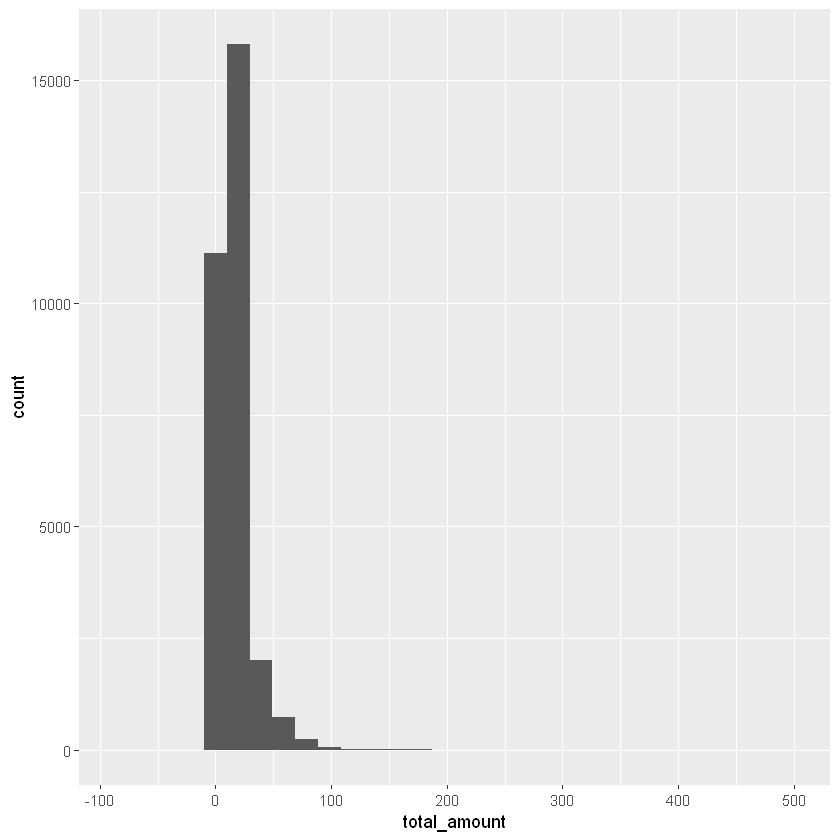

In [55]:
# Plot a histogram of total fares
ggplot(taxis, aes(x = total_amount)) + geom_histogram()

In [60]:
# Filter the data
taxis_tolls <- filter(taxis, tolls_amount > 0)
head(taxis_tolls)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-01-01 00:00:56,2016-01-01 00:17:24,1,5.70,-73.98772,40.75057,1,N,-74.03557,40.71357,1,18.0,0.5,0.5,8.00,10.50,0.3,37.80
2,2016-01-01 00:01:01,2016-01-01 00:13:08,6,7.85,-73.97963,40.74326,1,N,-73.91187,40.76463,1,22.5,0.5,0.5,5.87,5.54,0.3,35.21
1,2016-01-01 00:01:14,2016-01-01 00:38:19,1,24.00,-73.99230,40.74929,5,N,-74.32033,40.72052,1,140.0,0.0,0.0,30.95,14.50,0.3,185.75
1,2016-01-29 09:18:31,2016-01-29 09:45:17,1,7.00,-74.00021,40.67845,1,N,-73.98305,40.73482,1,25.5,0.0,0.5,6.35,5.54,0.3,38.19
1,2016-01-29 09:18:31,2016-01-29 09:51:40,1,15.90,-73.98363,40.74764,2,N,-73.78705,40.64691,1,52.0,0.0,0.5,11.65,5.54,0.3,69.99
2,2016-01-29 09:18:31,2016-01-29 09:40:50,6,6.82,-73.95173,40.76949,1,N,-73.91217,40.75894,1,23.5,0.0,0.5,5.97,5.54,0.3,35.81


Warning message:
"Ignoring unknown parameters: bin"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



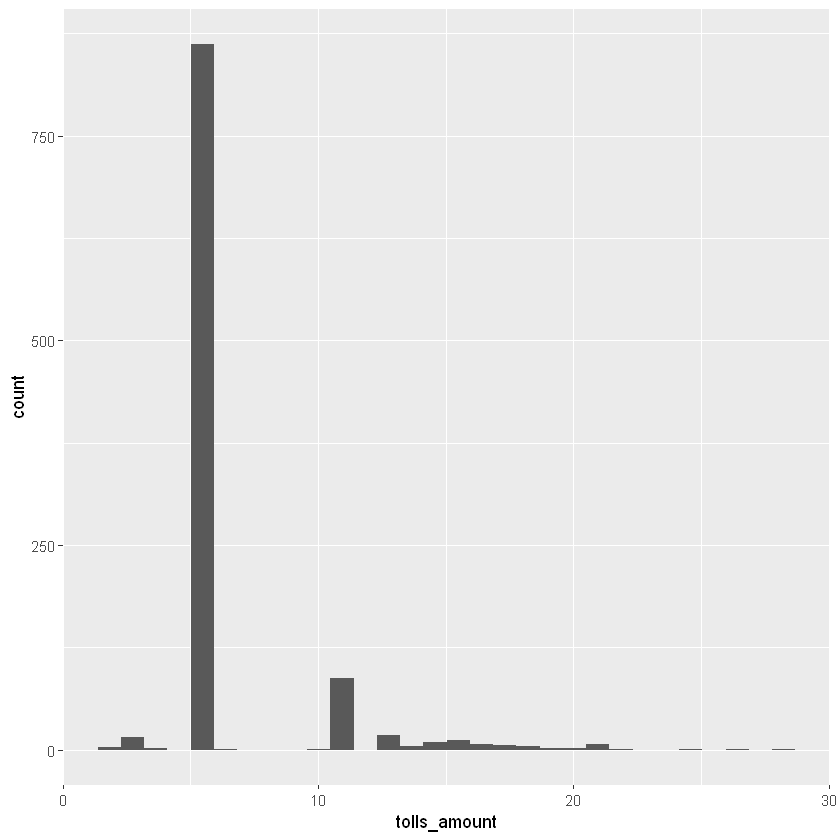

In [67]:
# Plot a histogram of tolls
ggplot(taxis_tolls, aes(x=tolls_amount)) + geom_histogram(bin=10)